In [42]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')

In [43]:
%matplotlib inline

In [58]:
%cd /Users/ckuhn/Documents/ABOVE/Landsat8_data/
justSWIR = pd.read_csv('justSWIR.csv', low_memory=False)

/Users/ckuhn/Documents/ABOVE/Landsat8_data


In [60]:
justSWIR.head(1)

,system:time_start,Lake_1-46-3,Abraham Lake,Greenpepper Lake,Sands of Time,Boot Lake,Canvasback Lake,YF04,Scoter Lake,YF03,...,West Crazy Lake,YF20,YF08,YF14,Thumb Lake,Buddy Lake,Twelvemile Lake,Twin Lake,Shack Lake,YF02
0,"Jun 1, 2016",0.187,0.154,0.313,NaN,0.098,0.257,0.207,0.24,0.064,...,NaN,0.096,0.151,0.17,0.062,0.087,0.152,0.268,0.465,0.291


In [61]:
#justSWIR['Date'] = justSWIR['system:time_start']

In [62]:
df = pd.melt(justData, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

In [64]:
df.head(2)

,system:time_start,Lake,Reflectance
0,"Jun 1, 2016",Lake,Lake
1,"Jun 1, 2016",Lake,Lake


In [65]:
df.tail(2)

,system:time_start,Lake,Reflectance
5086,"Sep 23, 2016",Reflectance,NaN
5087,"Sep 23, 2016",Reflectance,NaN


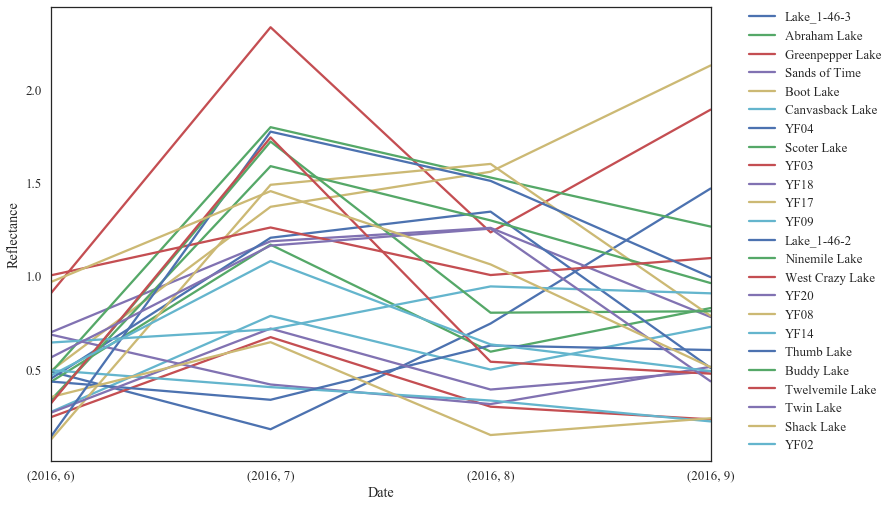

In [69]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   


df = justSWIR.set_index(pd.DatetimeIndex(justSWIR['system:time_start']))
GB  = df.groupby([(df.index.year),(df.index.month)]).sum()
GB.plot()

plt.ylabel('Reflectance')
plt.xlabel('Date')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

### Resample the dataframe to every month

In [13]:
df2 = df.set_index(pd.DatetimeIndex(df['system:time_start']))
df2 = df.resample("M").median()

df2 = df2.reset_index()
df2
# unset the index

#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html

,system:time_start,Lake_1-46-3,Abraham Lake,Greenpepper Lake,Sands of Time,Boot Lake,Canvasback Lake,YF04,Scoter Lake,YF03,...,West Crazy Lake,YF20,YF08,YF14,Thumb Lake,Buddy Lake,Twelvemile Lake,Twin Lake,Shack Lake,YF02
0,2016-06-30,0.132,0.266,0.189,0.267,0.1285,-0.2000,0.0150,-0.0430,-0.3095,...,0.3875,-0.4300,-0.0725,-0.016,-0.1180,0.1980,-0.1070,0.229,0.1830,-0.341
1,2016-07-31,-0.247,-0.006,-0.058,0.188,0.0380,-0.0375,0.0660,-0.0780,-0.2510,...,0.4200,-0.2035,0.0130,-0.230,-0.3255,0.5145,-0.2020,-0.087,0.1030,-0.359
2,2016-08-31,-0.378,-0.050,-0.075,-0.069,0.3130,0.2860,NaN,-0.0305,-0.0025,...,0.0985,-0.3480,-0.3445,-0.134,0.0030,0.6920,-0.2635,0.183,0.0270,-0.567
3,2016-09-30,NaN,0.000,-0.306,-0.125,-0.1520,-0.1770,0.0565,-0.3530,-0.3585,...,-0.0100,-0.5720,-0.2530,-0.223,0.1800,0.5120,-0.0340,0.036,-0.1655,-0.310


#### Change the shape of the dataframe for plotting

In [29]:
#remelt that shit
df3 = pd.melt(df2, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

In [30]:
df3.head(1)

,system:time_start,Lake,Reflectance
0,2016-06-30,Lake_1-46-3,0.132


In [31]:
df3['Scaled Reflectance'] = df3['Reflectance'].add(1.6)

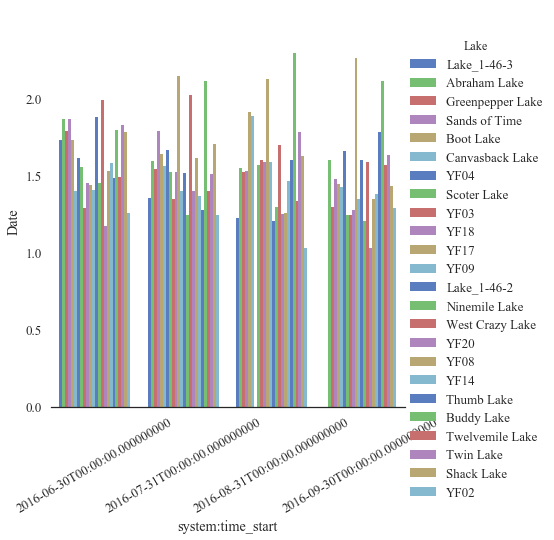

In [32]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="system:time_start", y="Scaled Reflectance", hue="Lake", data=df3,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("Reflectance")
g.set_ylabels("Date")
g.set_xticklabels(rotation=30)

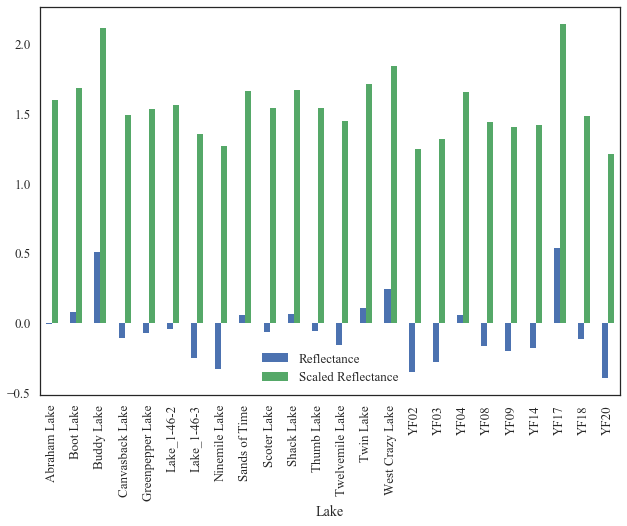

In [37]:
df3.groupby('Lake').median().plot(kind='bar')

In [41]:
df3.groupby(['system:time_start']).mean()#.plot(kind = 'bar')

,Reflectance,Scaled Reflectance
system:time_start,,
2016-06-30,-0.001083,1.598917
2016-07-31,-0.038021,1.561979
2016-08-31,-0.037130,1.562870
2016-09-30,-0.111239,1.488761
